In [1]:
%matplotlib inline

# Import custom scripts

In [2]:
path_scripts = '/mnt/kauffman/joosts/projects/STRT_epidermis/scripts'

In [3]:
import sys
sys.path.append(path_scripts)

In [4]:
from EPI_misc_scripts_v1_1 import *
from EPI_affinity_propagation_v1_0 import *
from EPI_neg_binom_regression_v1_1 import *
from EPI_pseudotemporal_ordering_v1_0 import *
from EPI_gene_neighbor_network_v1_0 import *

Couldn't import dot_parser, loading of dot files will not be possible.


In [5]:
import matplotlib as mpl

# Initialize engines

In [6]:
from ipyparallel import Client

In [7]:
c = Client(profile='default')

In [8]:
dview = c[:]

In [9]:
dview.execute('import sys')
dview.execute('sys.path.append("/mnt/kauffman/joosts/projects/STRT_epidermis/scripts")')
dview.execute('from EPI_misc_scripts_v1_1 import *')
dview.execute('from EPI_affinity_propagation_v1_0 import *')
dview.execute('from EPI_neg_binom_regression_v1_1 import *')
dview.execute('from EPI_pseudotemporal_ordering_v1_0 import *')
dview.execute('from EPI_gene_neighbor_network_v1_0 import *')

<AsyncResult: finished>

# Import Data

In [10]:
exp_id = '201509151726'
path_input = '/mnt/kauffman/joosts/projects/STRT_epidermis/data_input/v1.8'
path_output = '/mnt/kauffman/joosts/projects/STRT_epidermis/data_output/v1.8'
path_figures = '/mnt/kauffman/joosts/projects/STRT_epidermis/figures/v1.8'

In [11]:
seq = loadData_v1(path_input, exp_id, 'seq', 'DataFrame')
meta = loadData_v1(path_input, exp_id, 'meta', 'DataFrame')

In [12]:
s_groups_1st = loadData_v1(path_output, exp_id, 's_groups_1st', 'Series')
g_groups_1st = loadData_v1(path_output, exp_id, 'g_groups_1st', 'Series')

In [13]:
NBR_1st_traces = loadData_from_pickle_v1(path_output, exp_id, 'NBR_1st_traces')
NBR_1st_summary = loadData_from_pickle_v1(path_output, exp_id,'NBR_1st_summary')
NBR_1st_bin_bl = loadData_from_pickle_v1(path_output,exp_id,'NBR_1st_bin_bl')
NBR_1st_size_bl = loadData_from_pickle_v1(path_output,exp_id,'NBR_1st_size_bl')
NBR_1st_bin_gr = loadData_from_pickle_v1(path_output,exp_id,'NBR_1st_bin_gr')
NBR_1st_size_gr = loadData_from_pickle_v1(path_output,exp_id,'NBR_1st_size_gr')

In [14]:
NBR_2nd_traces = loadData_from_pickle_v1(path_output, exp_id, 'NBR_2nd_traces')
NBR_2nd_summary = loadData_from_pickle_v1(path_output, exp_id,'NBR_2nd_summary')
NBR_2nd_bin_bl = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_bin_bl')
NBR_2nd_size_bl = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_size_bl')
NBR_2nd_bin_gr = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_bin_gr')
NBR_2nd_size_gr = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_size_gr')

In [15]:
NBR_global_traces = loadData_from_pickle_v1(path_output, exp_id,'NBR_global_traces')
NBR_global_summary = loadData_from_pickle_v1(path_output, exp_id,'NBR_global_summary')
NBR_global_bin_bl = loadData_from_pickle_v1(path_output,exp_id,'NBR_global_bin_bl')
NBR_global_size_bl = loadData_from_pickle_v1(path_output,exp_id,'NBR_global_size_bl')
NBR_global_bin_gr = loadData_from_pickle_v1(path_output,exp_id,'NBR_global_bin_gr')
NBR_global_size_gr = loadData_from_pickle_v1(path_output,exp_id,'NBR_global_size_gr')

In [16]:
s_groups_2nd = loadData_v1(path_output, exp_id, 's_groups_2nd', 'Series')

In [17]:
PTO_coords_IFE = loadData_v1(path_output, exp_id, 'PTO_coords_IFE', 'Series')
PTO_coords_spatial = loadData_v1(path_output, exp_id, 'PTO_coords_spatial', 'Series')

In [18]:
IFE_fitted = loadData_v1(path_output, exp_id, 'IFE_fitted', 'DataFrame')
IFE_stats = loadData_v1(path_output, exp_id, 'IFE_stats', 'DataFrame')

In [19]:
spatial_fitted = loadData_v1(path_output, exp_id, 'spatial_fitted', 'DataFrame')
spatial_stats = loadData_v1(path_output, exp_id, 'spatial_stats', 'DataFrame')

In [20]:
PT_corr_max = loadData_v1(path_output, exp_id, 'PT_corr_max', 'Series')
PS_corr_max = loadData_v1(path_output, exp_id, 'PS_corr_max', 'Series')

### Colormaps

In [35]:
cmap_PST = {0:'silver', 1:'#e41a1c', 2:'#377eb8', 3:'silver'}

In [22]:
cmap_1st = {2:'#00CC00',
          1:'#FFE000',
          8:'#FF9900',
          0:'#FF3300',
          10:'#CC0000',
          6:'#cab2d6',
          3:'#A68BC2',
          4:'#65429A',
          5:'#000066',
          7:'#0066FF',
          9:'#33CCCC',
          11:'#FF99CC',
          12:'#660033'}

In [23]:
cmap_2nd = {0:'#33a02c',
            1:'#b2df8a',
            2:'#00FF00',
            3:'#FFE000',
            4:'#FF9900',
            5:'#FF3300',
            6:'#CC0000',
            7:'#CC0066',
            8:'#FF99CC',
            9:'#FFCCCC',
            10:'#D2C5E1',
            11:'#A68BC2',
            12:'#6a3d9a',
            13:'#2A183E',
            14:'#000066',
            15:'#0000FF',
            16:'#33CCFF',
            17:'#99CCFF',
            18:'#666699',
            19:'#000066',
            20:'#33CCCC',
            21:'#00FFFF',
            22:'#006666',
            23:'#FF99CC',
            24:'#660033'}

In [24]:
markers_2nd = {0: 'o',
            1: 'o',
            2: 'o',
            3:'s',
            4:'s',
            5:'s',
            6:'s',
            7:'^',
            8:'^',
            9:'^',
            10:'^',
            11:'^',
            12:'^',
            13:'^',
            14:'s',
            15:'D',
            16:'D',
            17:'D',
            18:'D',
            19:'D',
            20:'H',
            21:'H',
            22:'H',
            23:'s',
            24:'s'}

In [25]:
nmap_2nd_short = {0:'IFE B I',
                  1:'IFE B II',
                  2:'INFU B',
                  3:'IFE D I',
                  4:'IFE D II',
                  5:'IFE K I',
                  6:'IFE K II',
                  7:'uHF I',
                  8:'uHF II',
                  9:'uHF III',
                  10:'uHF IV',
                  11:'uHF V',
                  12:'uHF VI',
                  13:'uHF VII',
                  14:'SG',
                  15:'OB I',
                  16:'OB II',
                  17:'OB III',
                  18:'OB IV',
                  19:'OB V',
                  20:'IB I',
                  21:'IB II',
                  22:'IB III',
                  23:'TC',
                  24:'LH'}

In [26]:
markers_2nd_size = {0:750,
            1:750,
            2:750,
            3:750,
            4:750,
            5:750,
            6:750,
            7:750,
            8:750,
            9:750,
            10:750,
            11:750,
            12:750,
            13:750,
            14:750,
            15:500,
            16:500,
            17:500,
            18:500,
            19:500,
            20:750,
            21:750,
            22:750,
            23:750,
            24:750}

In [27]:
C = open('%s/cmap_Gn_Yl_Rd.txt' % path_input,'r').read().split()

cmap_Gn_Yl_Rd = mpl.colors.ListedColormap(C)

In [28]:
C = open('%s/cmap_GrVlBlCy.txt' % path_input,'r').read().replace(',','').split()

cmap_GrVlBlCy = mpl.colors.ListedColormap(C)

# Pseudospace vs. pseudotime dependent genes

## Select all genes which were either fitted to pseudotime or pseudospace; if gene has no p-value along one axis, set to 1

In [29]:
PST_stats = pd.DataFrame(1, index = list(set(IFE_stats.index) | set(spatial_stats.index)), columns = ['PT', 'PS'])

PST_stats.ix[IFE_stats.index, 'PT'] = IFE_stats['Pr(>Chisq)']
PST_stats.ix[spatial_stats.index, 'PS'] = spatial_stats['Pr(>Chisq)']

## Get Bonferroni cutoffs

In [30]:
bonferroni_IFE = 0.001 / len(IFE_stats.index)

In [31]:
bonferroni_spatial = 0.001 / len(spatial_stats.index)

In [32]:
len(PST_stats.index)

7893

## Identify pseudotime/pseudospace dependent genes

In [33]:
PST_genes = pd.Series(index = PST_stats.index)

for g in PST_genes.index:
    
    if PST_stats.ix[g, 'PT'] > bonferroni_IFE and PST_stats.ix[g, 'PS'] > bonferroni_spatial:
        PST_genes.ix[g] = 0
        
    elif PST_stats.ix[g, 'PT'] < bonferroni_IFE and PST_stats.ix[g, 'PS'] > bonferroni_spatial:
        PST_genes.ix[g] = 1
        
    elif PST_stats.ix[g, 'PT'] > bonferroni_IFE and PST_stats.ix[g, 'PS'] < bonferroni_spatial:
        PST_genes.ix[g] = 2
        
    elif PST_stats.ix[g, 'PT'] < bonferroni_IFE and PST_stats.ix[g, 'PS'] < bonferroni_spatial:
        PST_genes.ix[g] = 3

In [34]:
for gr in set(PST_genes):
    
    print gr, len(PST_genes[PST_genes==gr].index)

0.0 5937
1.0 1409
2.0 329
3.0 218


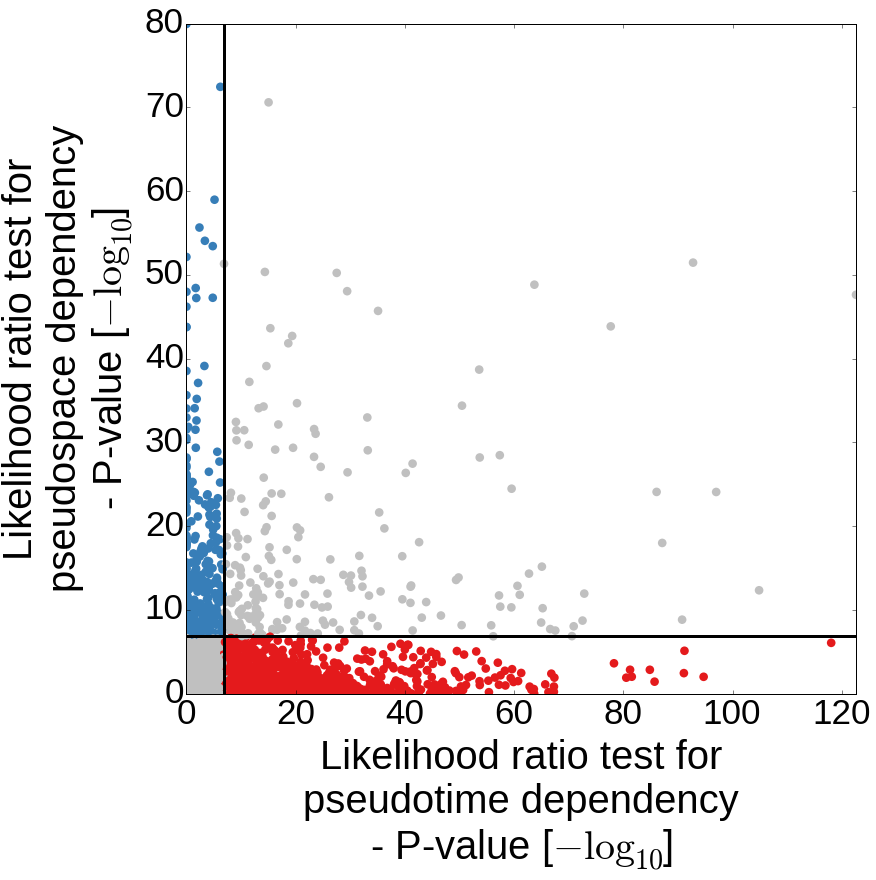

In [36]:
#create data

x_data = -np.log10(PST_stats.ix[PST_stats.index, 'PT'])
y_data = -np.log10(PST_stats.ix[PST_stats.index, 'PS'])

#create color list

clist = [cmap_PST[g] for g in PST_genes[PST_stats.index]]

#initialize figure

height = 12
width = 12

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax = plt.subplot()

#define x-axis

ax.set_xlim(x_data.min(), x_data.max())

ax.set_xlabel('Likelihood ratio test for\npseudotime dependency\n- P-value [$-\log_{10}$]', family = 'Liberation Sans', fontsize = 40)
ax.xaxis.set_label_coords(x = 0.5, y = -0.075)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(35) 
                tick.label.set_family('Liberation Sans')   

#define y-axis

ax.set_ylim(y_data.min(), y_data.max())

ax.set_ylabel('Likelihood ratio test for\npseudospace dependency\n- P-value [$-\log_{10}$]', family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(y = 0.5, x = -0.075)
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(35) 
                tick.label.set_family('Liberation Sans')   

#plot data

ax.scatter(x_data,
           y_data,
           c = clist, 
           linewidth = 0, 
           s= 75, 
           edgecolor = clist)

ax.axhline(y = -np.log10(bonferroni_IFE), c = 'k', linewidth = 3)
ax.axvline(x = -np.log10(bonferroni_spatial), c = 'k', linewidth = 3)

figname = 'v1.8_5_B_PT_and_PS_dependent_genes.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Plot pseudospacetime

In [42]:
n_bins = 15
PT_names = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
PS_names = [str(x) for x in range(26)]

In [38]:
#Pseudotime dependent cells (excluding immune cells, SG, uHF 1 - 2 and K6 1)

ix_sel = s_groups_2nd[s_groups_2nd.isin([7,8,9,14,20,23,24])].index

PT_corr_max_sel = PT_corr_max.copy()
PT_corr_max_sel.ix[ix_sel] = 'n.a.'

In [39]:
#Pseudospace dependent cells (excluding immune cells, SG)

ix_sel = s_groups_2nd[s_groups_2nd.isin([14,23,24])].index

PS_corr_max_sel = PS_corr_max.copy()
PS_corr_max_sel.ix[ix_sel] = 'n.a.'

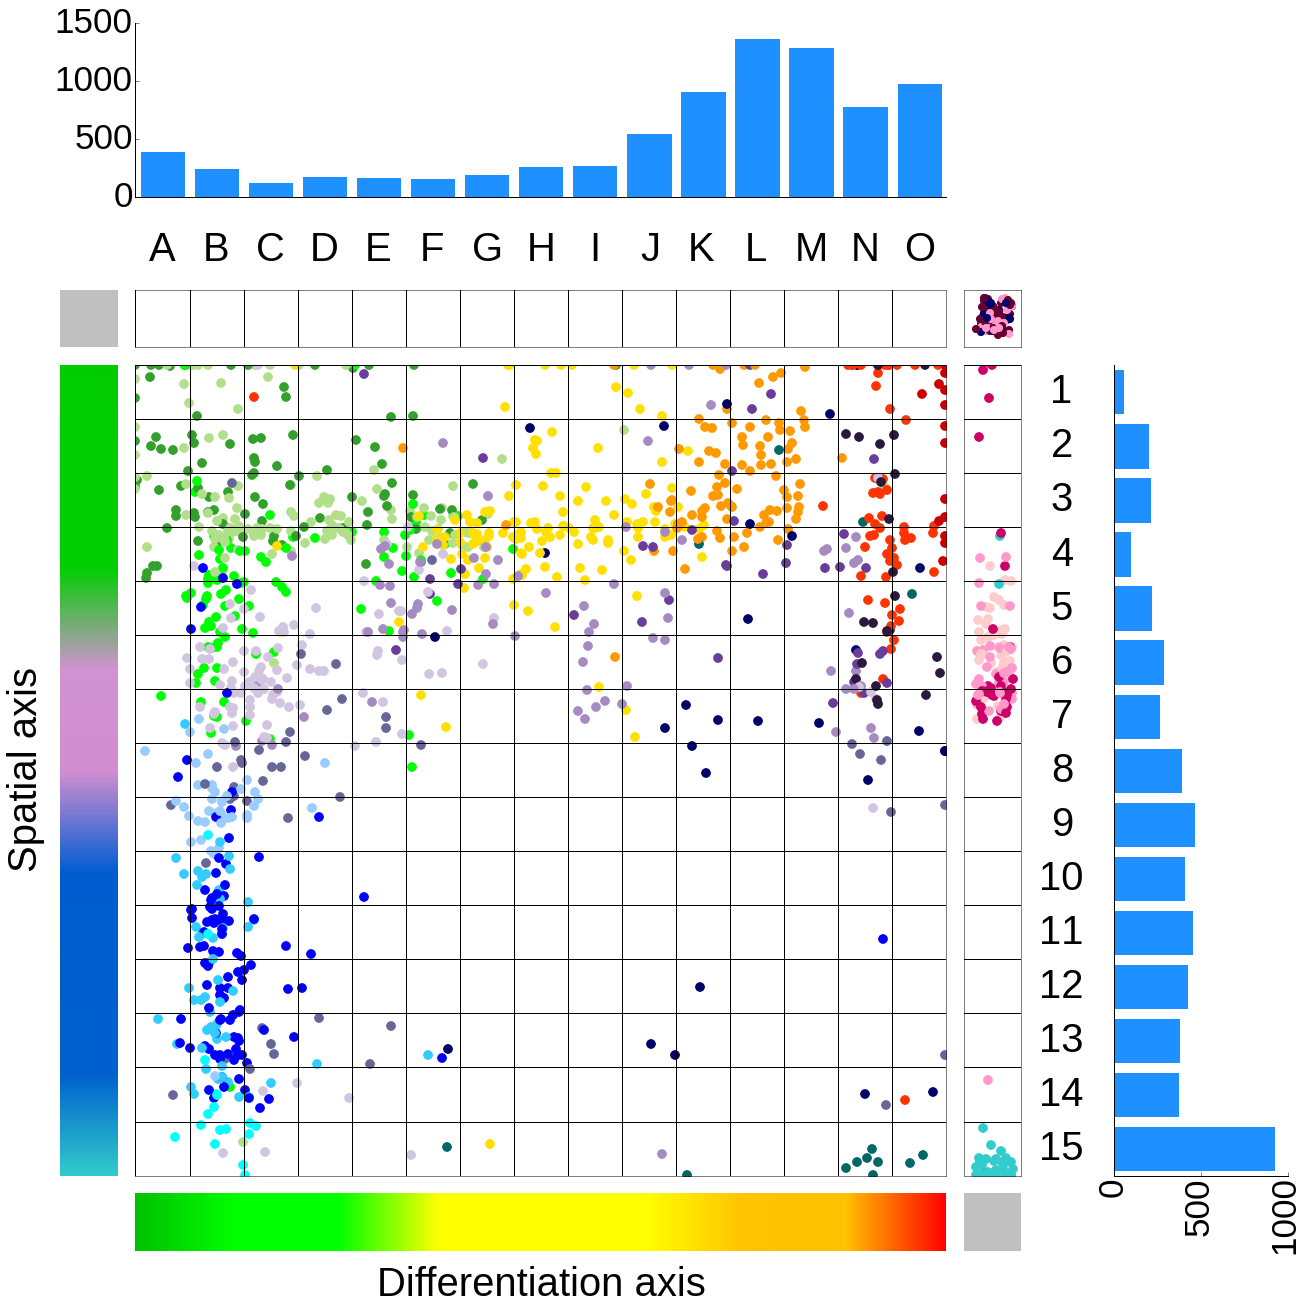

In [48]:
x_bins = PTO_bin_axis(PT_corr_max, n_bins, (0,831), PT_names)[0]
y_bins = PTO_bin_axis(PS_corr_max, n_bins, (0,1039), PS_names)[0]

x_data = PT_corr_max_sel
y_data = PS_corr_max_sel

gene_count = NBR_global_bin_bl.sum()

#initialize figure

height = 22
width = 22
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs1 = plt.GridSpec(5, 5, hspace=0.075, wspace = 0.075, height_ratios=[3, 1, 1, 14, 1], width_ratios = [1, 14, 1, 1, 3])

##################################################

#pseudospace legend

ax = plt.subplot(gs1[3,0])
ax.set_ylim(PTO_coords_spatial.max(),0)
for pos in np.arange(0, np.max(PTO_coords_spatial.values)):
    ax.axhspan(pos, pos + 1, color = cmap_GrVlBlCy(pos / np.max(PTO_coords_spatial.values)))
ax.set_ylabel('Spatial axis', family = 'Liberation Sans', fontsize = 40, labelpad = 15)
clean_axis(ax)

#pseudotime legend

ax = plt.subplot(gs1[4,1])
ax.set_xlim(0, PTO_coords_IFE.max())
for pos in np.arange(0, np.max(PTO_coords_IFE.values)):
    ax.axvspan(pos, pos + 1, color = cmap_Gn_Yl_Rd(pos / np.max(PTO_coords_IFE.values)))
ax.set_xlabel('Differentiation axis', family = 'Liberation Sans', fontsize = 40, labelpad = 15)

clean_axis(ax)

##################################################

#main plot PS - PT

ax = plt.subplot(gs1[3,1])

ax.set_xlim(0, PTO_coords_IFE.max())
ax.set_ylim(PTO_coords_spatial.max(),0)

#bins

for x in x_bins:
    ax.axvline(x, color = 'black', linewidth = 1)
for y in y_bins:
    ax.axhline(y, color = 'black', linewidth = 1)
    
#data
    
for ix in x_data.index:
    if x_data[ix] != 'n.a.' and y_data[ix] != 'n.a.':
        ax.scatter(x_data[ix], 
                   y_data[ix], 
                   s = 75, 
                   color = cmap_2nd[s_groups_2nd[ix]], 
                   edgecolor = cmap_2nd[s_groups_2nd[ix]])

remove_ticks(ax)

##################################################

#main plot only PS

ax = plt.subplot(gs1[4,2])
ax.axvspan(0,1, color = 'silver')
clean_axis(ax)

ax = plt.subplot(gs1[3,2])

ax.set_ylim(PTO_coords_spatial.max(),0)

#bins

for y in y_bins:
    ax.axhline(y, color = 'black', linewidth = 1)
    
#data
    
for ix in x_data.index:
    if x_data[ix] == 'n.a.' and y_data[ix] != 'n.a.':
        ax.scatter(np.random.rand() * 0.9 + 0.1,
                   y_data[ix], 
                   s = 75, 
                   color = cmap_2nd[s_groups_2nd[ix]], 
                   edgecolor = cmap_2nd[s_groups_2nd[ix]])

remove_ticks(ax)

##################################################

#main plot only PT

ax = plt.subplot(gs1[2,0])
ax.axvspan(0,1, color = 'silver')
clean_axis(ax)

ax = plt.subplot(gs1[2,1])

ax.set_xlim(0, PTO_coords_IFE.max())

#bins

for x in x_bins:
    ax.axvline(x, color = 'black', linewidth = 1)
    
#data
    
for ix in y_data.index:
    if x_data[ix] != 'n.a.' and y_data[ix] == 'n.a.':
        ax.scatter(x_data[ix],
                   np.random.rand() * 0.9 + 0.1, 
                   s = 75, 
                   color = cmap_2nd[s_groups_2nd[ix]], 
                   edgecolor = cmap_2nd[s_groups_2nd[ix]])

remove_ticks(ax)

##################################################

#main plot neither PT nor PS

ax = plt.subplot(gs1[2,2])

#data

ix_tmp = list(y_data.index)[::]
np.random.shuffle(ix_tmp)
    
for ix in ix_tmp:
    if x_data[ix] == 'n.a.' and y_data[ix] == 'n.a.':
        ax.scatter(np.random.rand() * 0.9 + 0.1,
                   np.random.rand() * 0.9 + 0.1, 
                   s = 50, 
                   color = cmap_2nd[s_groups_2nd[ix]], 
                   edgecolor = cmap_2nd[s_groups_2nd[ix]])

remove_ticks(ax)


##################################################

#gene count PT axis

ax = plt.subplot(gs1[0,1])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xlim(-0.5, n_bins - 0.5)

ax.set_ylim(0, 1500)
ax.set_xticks([])
ax.set_yticks([0, 500, 1000, 1500])
ax.set_yticklabels([0, 500, 1000, 1500], family = 'Liberation Sans', fontsize = 35)
    
ax.bar(left = [x - 0.4 for x in range(n_bins)], 
       height = [gene_count[x] for x in PT_names[:n_bins]], 
       width = 0.8, 
       color = 'dodgerblue', 
       edgecolor = 'dodgerblue')
    

##################################################

#gene count PS axis

ax = plt.subplot(gs1[3,4])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_ylim(n_bins - 0.5, - 0.5)

ax.set_yticks([])

ax.set_xlim(0, 1000)
ax.set_xticks([0, 500, 1000])
ax.set_xticklabels([0, 500, 1000], family = 'Liberation Sans', fontsize = 35, rotation = 'vertical')
    
ax.barh(bottom = [x - 0.4 for x in range(n_bins)], 
       width = [gene_count[x] for x in PS_names[:n_bins]], 
       height = 0.8, 
       color = 'dodgerblue', 
       edgecolor = 'dodgerblue')
    
##################################################

ax = plt.subplot(gs1[1,1])
ax.set_xlim(-0.5, n_bins - 0.5)
ax.set_ylim(0,1)
for pos, t in enumerate(PT_names[:n_bins]):
    ax.text(pos, 0.4, t, family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'center')
clean_axis(ax)

ax = plt.subplot(gs1[3,3])
ax.set_xlim(0,1)
ax.set_ylim(n_bins - 0.5, -0.5)
for pos, t in enumerate(PS_names[:n_bins]):
    ax.text(0.4, pos, str(int(t) + 1), family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'center')
clean_axis(ax)

figname = 'v1.8_6_C_Pseudospacetime.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

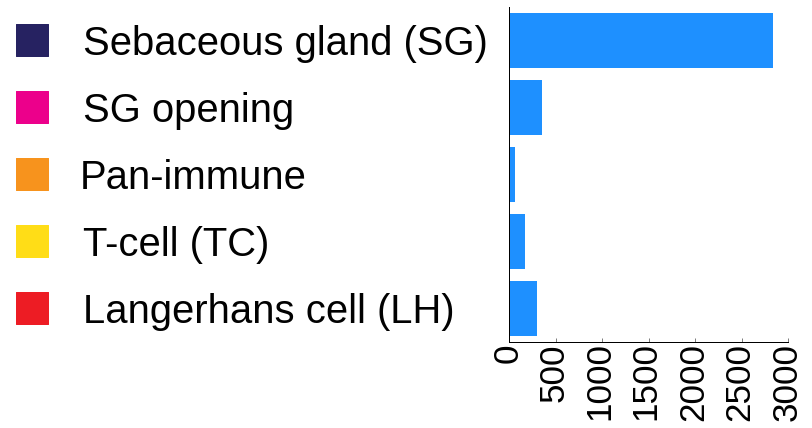

In [52]:
gene_count = NBR_global_bin_bl.sum()

#initialize figure

height = 6
width = 14
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(1, 2, wspace = 0.0, width_ratios = [9,5])

#plot labels

ax = plt.subplot(gs[0])

ax.set_ylim(4.5, -0.5)
ax.set_xlim(0,1)

clist = ['#262261','#EC008B','#F7931D','#FFDD17','#ED1C24']

for pos,gr in enumerate(['Sebaceous gland (SG)','SG opening','Pan-immune','T-cell (TC)','Langerhans cell (LH)']):
    
    ax.scatter(0.05, pos, color = clist[pos], marker = 's', s = 1000)
    
    ax.text(0.15, pos + 0.05, gr, family = 'Liberation Sans', fontsize = 40, va = 'center')
    
clean_axis(ax)

#plot data

ax = plt.subplot(gs[1])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_ylim(4.5, -0.5)

ax.set_yticks([])

ax.set_xlim(0, 3000)
ax.set_xticks([0, 500, 1000, 1500, 2000, 2500, 3000])
ax.set_xticklabels([0, 500, 1000, 1500, 2000, 2500, 3000], family = 'Liberation Sans', fontsize = 35, rotation = 'vertical')
    
ax.barh(bottom = [x - 0.4 for x in range(5)], 
       width = [gene_count[x] for x in ['SG','SG_opening','Immune','TC','LH']], 
       height = 0.8, 
       color = 'dodgerblue', 
       edgecolor = 'dodgerblue')

figname = 'v1.8_5_C_Other_groups.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Groups in pseudospacetime

In [187]:
def PTO_get_bins_2d_groups(groups, PT, PS, bins, PT_range, PS_range):
    
    output_dict = {}
    
    for gr in return_unique(groups):
        
        output_dict[gr] = []
        
        ix_all = groups[groups==gr].index
        n_all = float(len(ix_all))
        
        ix_PS_PT = [ix for ix in ix_all if PT[ix] != 'n.a.' and PS[ix] != 'n.a.']
        ix_PT = [ix for ix in ix_all if PT[ix] != 'n.a.' and PS[ix] == 'n.a.']
        ix_PS = [ix for ix in ix_all if PT[ix] == 'n.a.' and PS[ix] != 'n.a.']
        ix_none = [ix for ix in ix_all if PT[ix] == 'n.a.' and PS[ix] == 'n.a.']
                
        hist_PS_PT = np.histogram2d(x = PS[ix_PS_PT].astype(float),
                                    y = PT[ix_PS_PT].astype(float), 
                                    bins = bins, 
                                    range = [PS_range, PT_range])[0]
        
        output_dict[gr].append(hist_PS_PT / n_all)
        
        hist_PT = np.histogram(a = PT[ix_PT].astype(float), bins = bins, range = PT_range)[0]
        
        output_dict[gr].append(hist_PT / n_all)
        
        hist_PS = np.histogram(a = PS[ix_PS].astype(float), bins = bins, range = PS_range)[0]
        
        output_dict[gr].append(hist_PS / n_all)
        
        output_dict[gr].append(np.matrix(len(ix_none)) / n_all)
        
    return output_dict

In [191]:
#combine immune cell populations

s_groups_2nd_tmp = s_groups_2nd.copy()

s_groups_2nd_tmp[s_groups_2nd_tmp==24] = 23

In [192]:
groups_2nd_bin_2d = PTO_get_bins_2d_groups(s_groups_2nd_tmp, PT_corr_max_sel, PS_corr_max_sel, 15, [0,831], [0,1039])

In [117]:
#define position dict

pos_dict_2nd = {0:(0,0),
                1:(0,1),
                2:(0,2),
                3:(0,3),
                4:(0,4),
                5:(0,5),
                6:(1,0),
                7:(1,1),
                8:(1,2),
                9:(1,3),
                10:(1,4),
                11:(1,5),
                12:(2,0),
                13:(2,1),
                14:(2,2),
                15:(2,3),
                16:(2,4),
                17:(2,5),
                18:(3,0),
                19:(3,1),
                20:(3,2),
                21:(3,3),
                22:(3,4)}

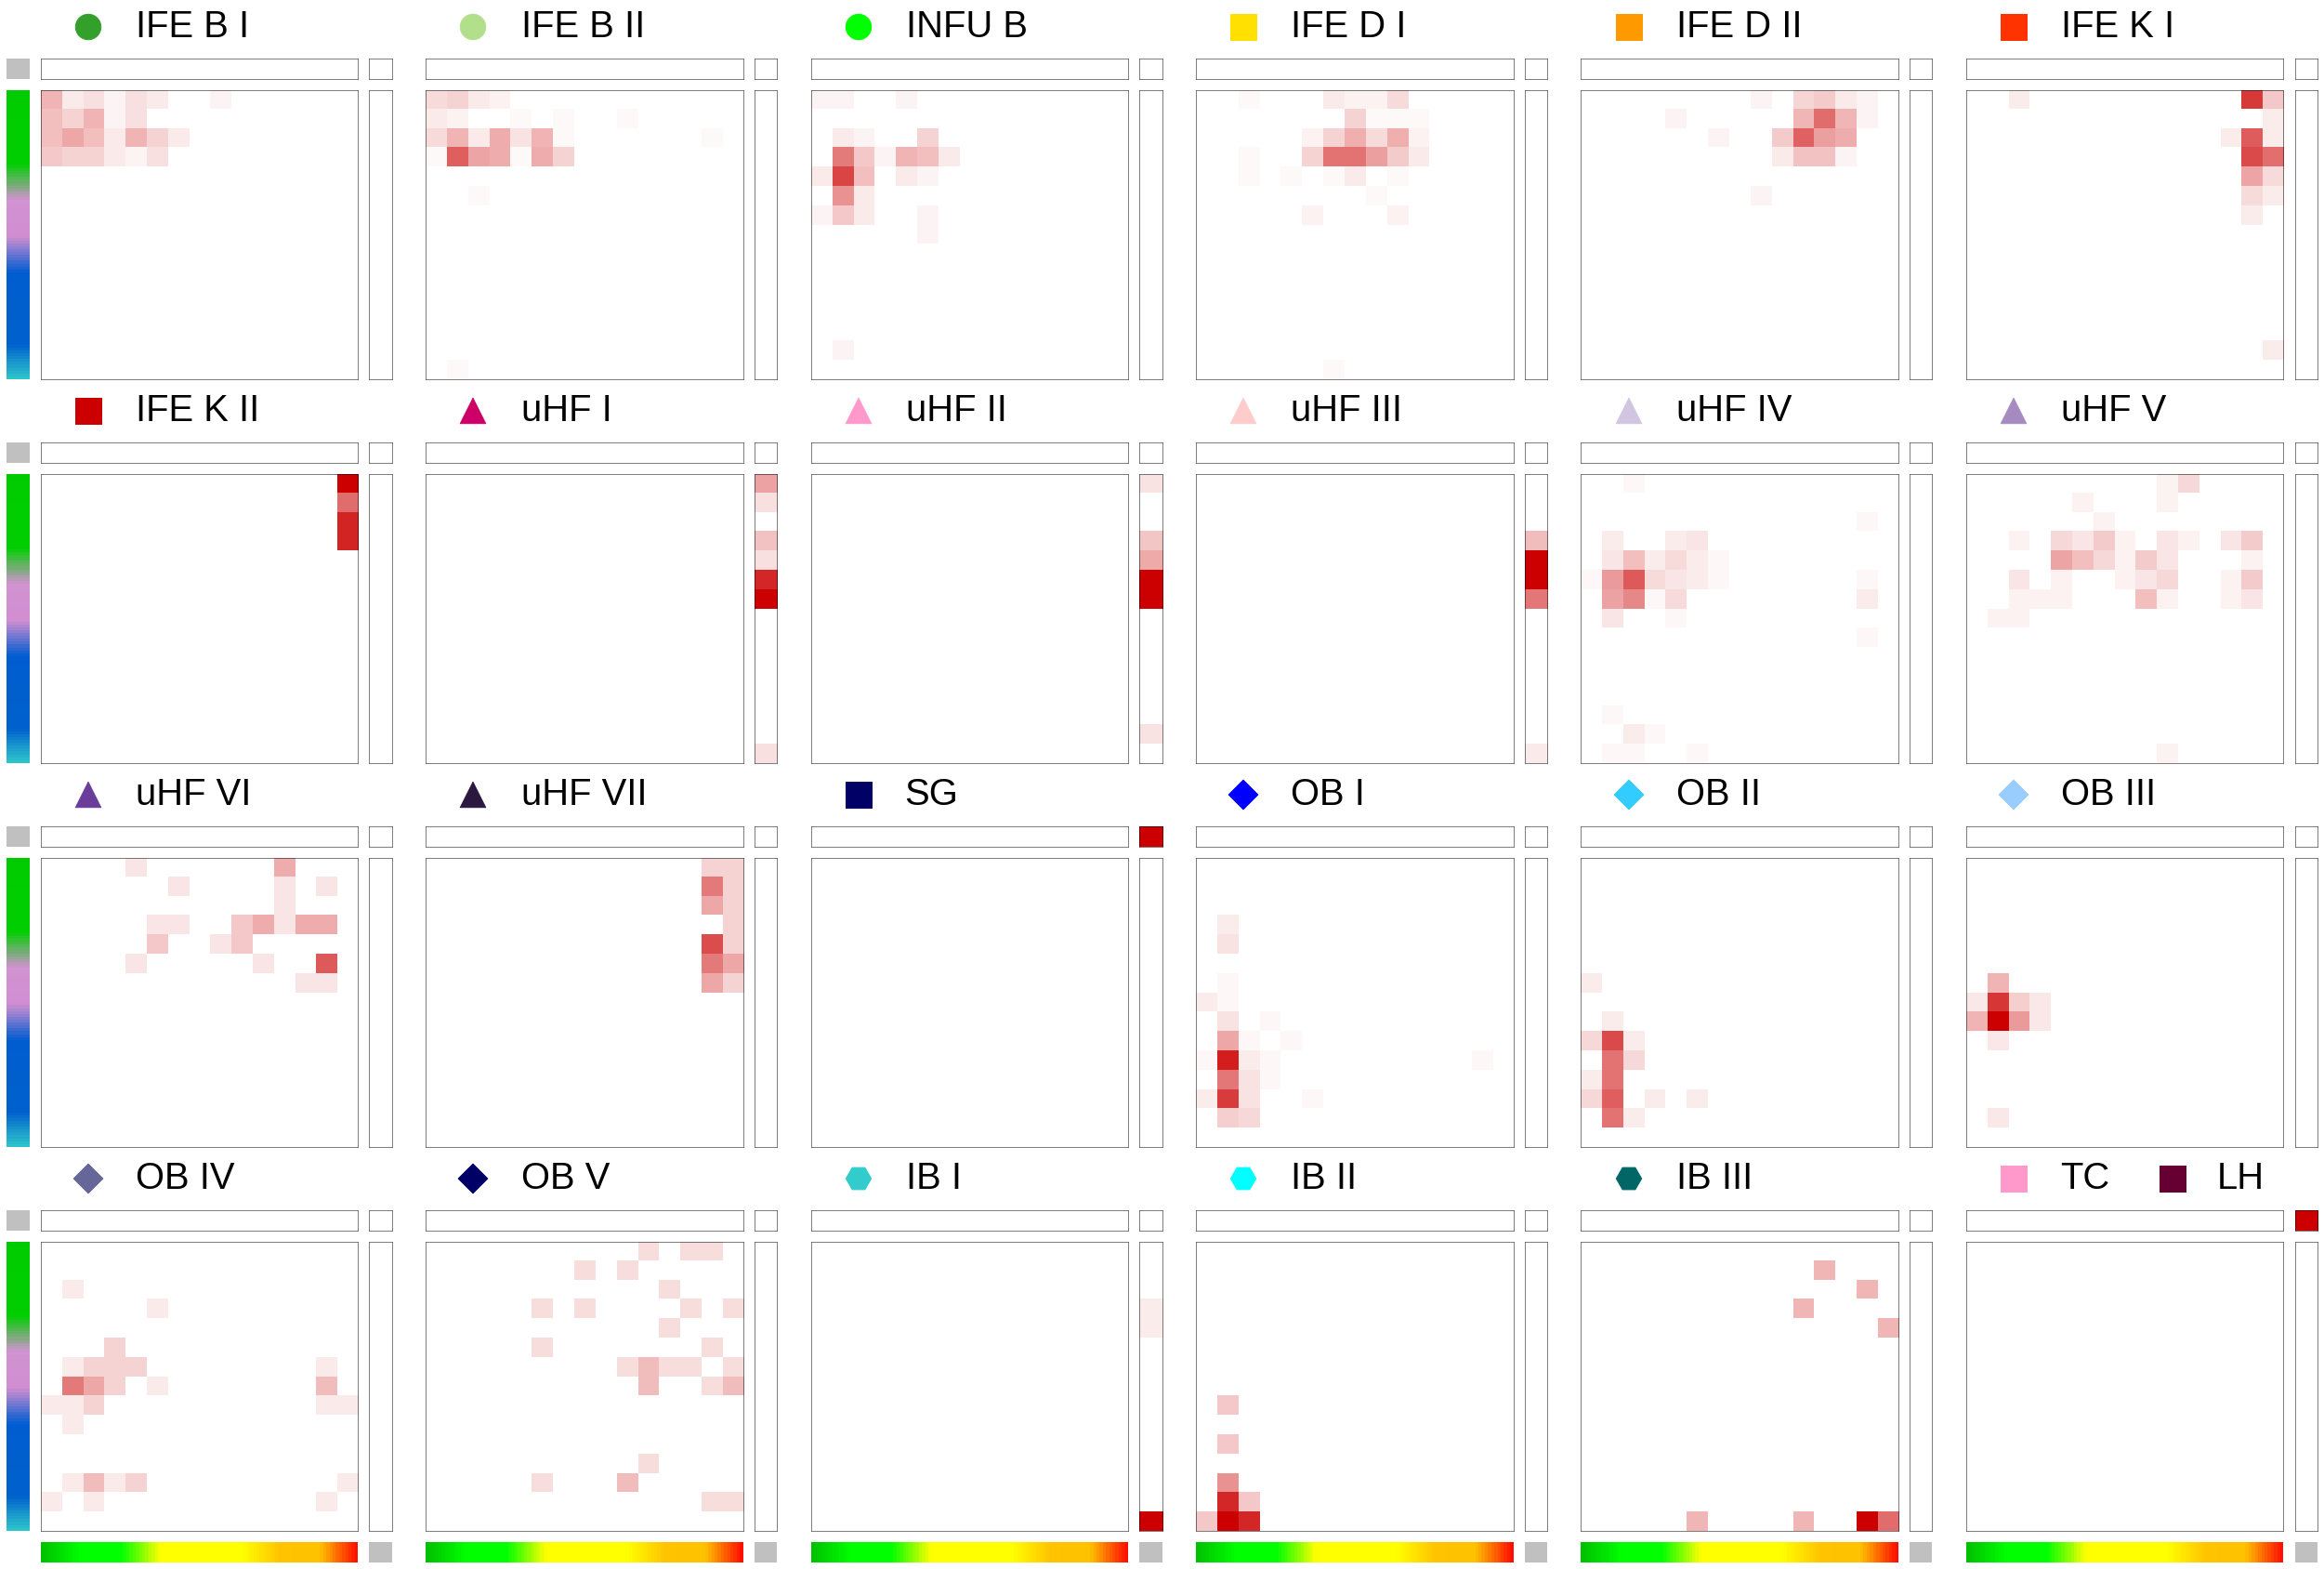

In [360]:
data = groups_2nd_bin_2d
groups = s_groups_2nd
pos_dict = pos_dict_2nd
cmap = mpl.colors.LinearSegmentedColormap.from_list("cmap_tmp", ('#FFFFFF','#CC0000'), N = 100)
cmap_groups = cmap_2nd
markers = markers_2nd
marker_size = markers_2nd_size
names = nmap_2nd_short

#initialize figure

height = 30
width = 45
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

col = 1 + 3 * 6
col_width = [1] + [14, 1, 0.5] * 6

row = 3 * 4 + 1
row_width = [2, 1, 14] * 4 + [1]

gs = plt.GridSpec(row, col, hspace=0.10, wspace = 0.10, height_ratios = row_width, width_ratios = col_width)

#pseudospace legend

for pos in [(1,0), (4,0), (7,0), (10,0)]:
    
    ax = plt.subplot(gs[pos[0], pos[1]])
    
    ax.axvspan(0,1, color = 'silver')
    clean_axis(ax)
    
for pos in [(2,0), (5,0), (8,0), (11,0)]:
    
    ax = plt.subplot(gs[pos[0], pos[1]])
    
    ax.set_ylim(1,0)

    for pos in np.arange(0, 1, 0.01):
            ax.axhspan(pos, pos + 0.01, color = cmap_GrVlBlCy(pos))
    clean_axis(ax)
    
#pseudotime legend

for pos in [(12,2), (12,5), (12,8), (12,11), (12,14), (12,17)]:
    
    ax = plt.subplot(gs[pos[0], pos[1]])
    
    ax.axvspan(0,1, color = 'silver')
    clean_axis(ax)
    
for pos in [(12,1), (12,4), (12,7), (12,10), (12,13), (12,16)]:
    
    ax = plt.subplot(gs[pos[0], pos[1]])
    
    for pos in np.arange(0, 1, 0.01):
        ax.axvspan(pos, pos + 0.01, color = cmap_Gn_Yl_Rd(pos))
    clean_axis(ax)
    
#iterate over groups

for gr in return_unique(s_groups_2nd)[:-2]:
    
    pos = pos_dict[gr]
    
    #plot group names
    
    ax = plt.subplot(gs[pos[0] * 3, pos[1] * 3 + 1])
    
    ax.set_xlim(0,1)
    
    ax.scatter(0.15, 0.5, color = cmap_groups[gr], marker = markers_2nd[gr], s = marker_size[gr])
    ax.text(0.3, 0.5, names[gr], family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'left')
    
    clean_axis(ax)
    
    #plot PS-PT
    
    ax = plt.subplot(gs[pos[0] * 3 + 2, pos[1] * 3 + 1])
    
    ax.matshow(data[gr][0], cmap = cmap, vmin = 0, vmax = 0.25, aspect = 'auto')
    
    remove_ticks(ax)
    
    #plot PS - no PT
    
    ax = plt.subplot(gs[pos[0] * 3 + 2, pos[1] * 3 + 2])
    
    ax.matshow(np.matrix(data[gr][2]).T, cmap = cmap, vmin = 0, vmax = 0.25, aspect = 'auto')
    
    remove_ticks(ax)
    
    #plot no PS - PT
    
    ax = plt.subplot(gs[pos[0] * 3 + 1, pos[1] * 3 + 1])
    
    ax.matshow(np.matrix(data[gr][1]), cmap = cmap, vmin = 0, vmax = 0.25, aspect = 'auto')

    remove_ticks(ax)
    
    #plot no PS - no PT
    
    ax = plt.subplot(gs[pos[0] * 3 + 1, pos[1] * 3 + 2])
    
    ax.matshow(data[gr][3], cmap = cmap, vmin = 0, vmax = 0.25, aspect = 'auto')

    remove_ticks(ax)
    
#fix last group manually

#plot group names
    
ax = plt.subplot(gs[3 * 3, 5 * 3 + 1])
    
ax.set_xlim(0,1)
    
ax.scatter(0.15, 0.5, color = cmap_groups[23], marker = markers_2nd[23], s = marker_size[23])
ax.scatter(0.65, 0.5, color = cmap_groups[24], marker = markers_2nd[24], s = marker_size[24])
ax.text(0.3, 0.5, names[23], family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'left')
ax.text(0.8, 0.5, names[24], family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'left')

clean_axis(ax)
    
#plot PS-PT
    
ax = plt.subplot(gs[3 * 3 + 2, 5 * 3 + 1])
    
ax.matshow(data[23][0], cmap = cmap, vmin = 0, vmax = 0.25, aspect = 'auto')
    
remove_ticks(ax)
    
#plot PS - no PT
    
ax = plt.subplot(gs[3 * 3 + 2, 5 * 3 + 2])
    
ax.matshow(np.matrix(data[23][2]).T, cmap = cmap, vmin = 0, vmax = 0.25, aspect = 'auto')
    
remove_ticks(ax)
    
#plot no PS - PT
    
ax = plt.subplot(gs[3 * 3 + 1, 5 * 3 + 1])
    
ax.matshow(np.matrix(data[23][1]), cmap = cmap, vmin = 0, vmax = 0.25, aspect = 'auto')

remove_ticks(ax)
    
#plot no PS - no PT
    
ax = plt.subplot(gs[3 * 3 + 1, 5 * 3 + 2])
    
ax.matshow(data[23][3], cmap = cmap, vmin = 0, vmax = 0.25, aspect = 'auto')

remove_ticks(ax)

figname = 'v1.8_5_C_Pseudospacetime_populations.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

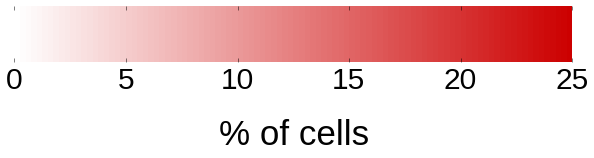

In [308]:
cmap = mpl.colors.LinearSegmentedColormap.from_list("cmap_tmp", ('#FFFFFF','#CC0000'), N = 100)

#initialize figure

height = 1
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axvspan(pos, pos + 0.001, color = cmap(pos))
    
clean_axis(axLabel)

axLabel.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axLabel.set_xticklabels(['0','5','10','15','20','25'], family = 'Liberation Sans', fontsize = 30)
    
plt.rcParams['xtick.major.pad'] = 10

axLabel.set_xlabel('% of cells', family = 'Liberation Sans', fontsize = 35)
axLabel.xaxis.set_label_coords(0.5, -1)

# Model comparison - get data

## Get data - global

In [227]:
NxK_global = loadData_from_pickle_v1(path_output, exp_id, 'NBR_global_NxK')

In [50]:
coeff_dict = {'0':['Baseline'],
              '1':['Baseline'] + [c for c in 'ABCDEFGHIJKLMNO'],
              '2':['Baseline'] + [c for c in 'ABCDEFGHIJKLMNO'] + [str(x) for x in range(15)],
              '3':['Baseline','SG'] + [c for c in 'ABCDEFGHIJKLMNO'] + [str(x) for x in range(15)],
              '4':['Baseline','SG','SG_opening'] + [c for c in 'ABCDEFGHIJKLMNO'] + [str(x) for x in range(15)],
              '5':['Baseline','SG','SG_opening','Immune'] + [c for c in 'ABCDEFGHIJKLMNO'] + [str(x) for x in range(15)],
              '6':['Baseline','SG','SG_opening','Immune','TC'] + [c for c in 'ABCDEFGHIJKLMNO'] + [str(x) for x in range(15)],
              '7':['Baseline','SG','SG_opening','Immune','TC','LH'] + [c for c in 'ABCDEFGHIJKLMNO'] + [str(x) for x in range(15)]}

In [119]:
NBR_global_sim_cells, NBR_global_sim_groups, NBR_global_sim_coeffs  = neg_binom_simulate_data_v3(NBR_global_traces, NxK_global, s_groups_2nd, coeff_dict, repeats=100)

In [130]:
#saveData_to_pickle_v1(NBR_global_sim_cells, path_output, exp_id, 'NBR_global_sim_cells')
#saveData_to_pickle_v1(NBR_global_sim_groups, path_output, exp_id, 'NBR_global_sim_groups')
#saveData_to_pickle_v1(NBR_global_sim_coeffs, path_output, exp_id, 'NBR_global_sim_coeffs')

In [64]:
NBR_global_sim_cells = loadData_from_pickle_v1(path_output, exp_id, 'NBR_global_sim_cells')
NBR_global_sim_groups = loadData_from_pickle_v1(path_output, exp_id, 'NBR_global_sim_groups')
NBR_global_sim_coeffs = loadData_from_pickle_v1(path_output, exp_id, 'NBR_global_sim_coeffs')

## Get data - global shuffled

In [55]:
NBR_global_shf_traces = loadData_from_pickle_v1(path_output, exp_id, 'NBR_global_shf_traces')

In [49]:
NxK_global_shf = loadData_from_pickle_v1(path_output, exp_id, 'NBR_global_NxK_shf')

In [57]:
NBR_global_shf_sim_cells, NBR_global_shf_sim_groups, NBR_global_shf_sim_coeffs  = neg_binom_simulate_data_v3(NBR_global_shf_traces, NxK_global_shf, s_groups_2nd, coeff_dict, repeats=100)

In [58]:
#saveData_to_pickle_v1(NBR_global_shf_sim_cells, path_output, exp_id, 'NBR_global_shf_sim_cells')
#saveData_to_pickle_v1(NBR_global_shf_sim_groups, path_output, exp_id, 'NBR_global_shf_sim_groups')
#saveData_to_pickle_v1(NBR_global_shf_sim_coeffs, path_output, exp_id, 'NBR_global_shf_sim_coeffs')

## Get data - 1st

In [253]:
seq_ = dropNull(seq, path_input, cutoff_mean = 0.00)


Dropping spikes from dataset

Dropping repeats from dataset

Dropping unexpressed genes from dataset


In [254]:
NxK_1st = pd.DataFrame(index = [str(x) for x in set(s_groups_1st)] + ['Baseline'], columns = s_groups_1st.index).fillna(0)
    
NxK_1st.ix['Baseline'] = seq_[NxK_1st.columns].sum(axis = 0) / seq_[NxK_1st.columns].sum(axis = 0).mean()

for group in set(s_groups_1st):
        
    NxK_1st.ix[str(group), s_groups_1st[s_groups_1st == group].index] = 1

In [257]:
NBR_1st_sim_cells, NBR_1st_sim_groups, NBR_1st_sim_coeffs  = neg_binom_simulate_data_v3(NBR_1st_traces, NxK_1st, s_groups_2nd, {}, repeats=100)

In [258]:
saveData_to_pickle_v1(NBR_1st_sim_cells, path_output, exp_id, 'NBR_1st_sim_cells')
saveData_to_pickle_v1(NBR_1st_sim_groups, path_output, exp_id, 'NBR_1st_sim_groups')
saveData_to_pickle_v1(NBR_1st_sim_coeffs, path_output, exp_id, 'NBR_1st_sim_coeffs')

In [65]:
NBR_1st_sim_cells = loadData_from_pickle_v1(path_output, exp_id, 'NBR_1st_sim_cells')
NBR_1st_sim_groups = loadData_from_pickle_v1(path_output, exp_id, 'NBR_1st_sim_groups')
NBR_1st_sim_coeffs = loadData_from_pickle_v1(path_output, exp_id, 'NBR_1st_sim_coeffs')

## Get data - 2nd

In [266]:
NxK_2nd = pd.DataFrame(index = [str(x) for x in set(s_groups_2nd)] + ['Baseline'], columns = s_groups_2nd.index).fillna(0)
    
NxK_2nd.ix['Baseline'] = seq_[NxK_2nd.columns].sum(axis = 0) / seq_[NxK_2nd.columns].sum(axis = 0).mean()

for group in set(s_groups_2nd):
        
    NxK_2nd.ix[str(group), s_groups_2nd[s_groups_2nd == group].index] = 1

In [267]:
NBR_2nd_sim_cells, NBR_2nd_sim_groups, NBR_2nd_sim_coeffs  = neg_binom_simulate_data_v3(NBR_2nd_traces, NxK_2nd, s_groups_2nd, {}, repeats=100)

In [268]:
#saveData_to_pickle_v1(NBR_2nd_sim_cells, path_output, exp_id, 'NBR_2nd_sim_cells')
#saveData_to_pickle_v1(NBR_2nd_sim_groups, path_output, exp_id, 'NBR_2nd_sim_groups')
#saveData_to_pickle_v1(NBR_2nd_sim_coeffs, path_output, exp_id, 'NBR_2nd_sim_coeffs')

In [66]:
NBR_2nd_sim_cells = loadData_from_pickle_v1(path_output, exp_id, 'NBR_2nd_sim_cells')
NBR_2nd_sim_groups = loadData_from_pickle_v1(path_output, exp_id, 'NBR_2nd_sim_groups')
NBR_2nd_sim_coeffs = loadData_from_pickle_v1(path_output, exp_id, 'NBR_2nd_sim_coeffs')

# Addition of signatures

In [303]:
genes_sel = dropNull(seq, path_input, cutoff_mean = 0.10).index


Dropping spikes from dataset

Dropping repeats from dataset

Dropping unexpressed genes from dataset


In [304]:
len(genes_sel)

6949

In [89]:
NBR_global_sim_coeffs_sc = neg_binom_simulate_score_per_coeff_v3(seq[s_groups_1st.index], NBR_global_sim_coeffs.ix[genes_sel])

In [84]:
NBR_global_shf_sim_coeffs_sc = neg_binom_simulate_score_per_coeff_v3(seq[s_groups_1st.index], NBR_global_shf_sim_coeffs.ix[genes_sel])

In [90]:
NBR_global_sim_coeffs_sc_rel = NBR_global_sim_coeffs_sc / NBR_global_sim_coeffs_sc.ix[['explained','underexplained']].sum()

In [85]:
NBR_global_shf_sim_coeffs_sc_rel = NBR_global_shf_sim_coeffs_sc / NBR_global_shf_sim_coeffs_sc.ix[['explained','underexplained']].sum()

In [86]:
coeff_names = {'0':'Baseline',
               '1':'+ Differentiation\nsignatures',
               '2':'+ Spatial / niche\nsignatures',
               '3':'+ Sebaceous gland\nsignature',
               '4':'+ SG opening\nsignature',
               '5':'+ Pan-immune\nsignature',
               '6':'+ T-cell\nsignature',
               '7':'+ Langerhans cell\nsignature'}

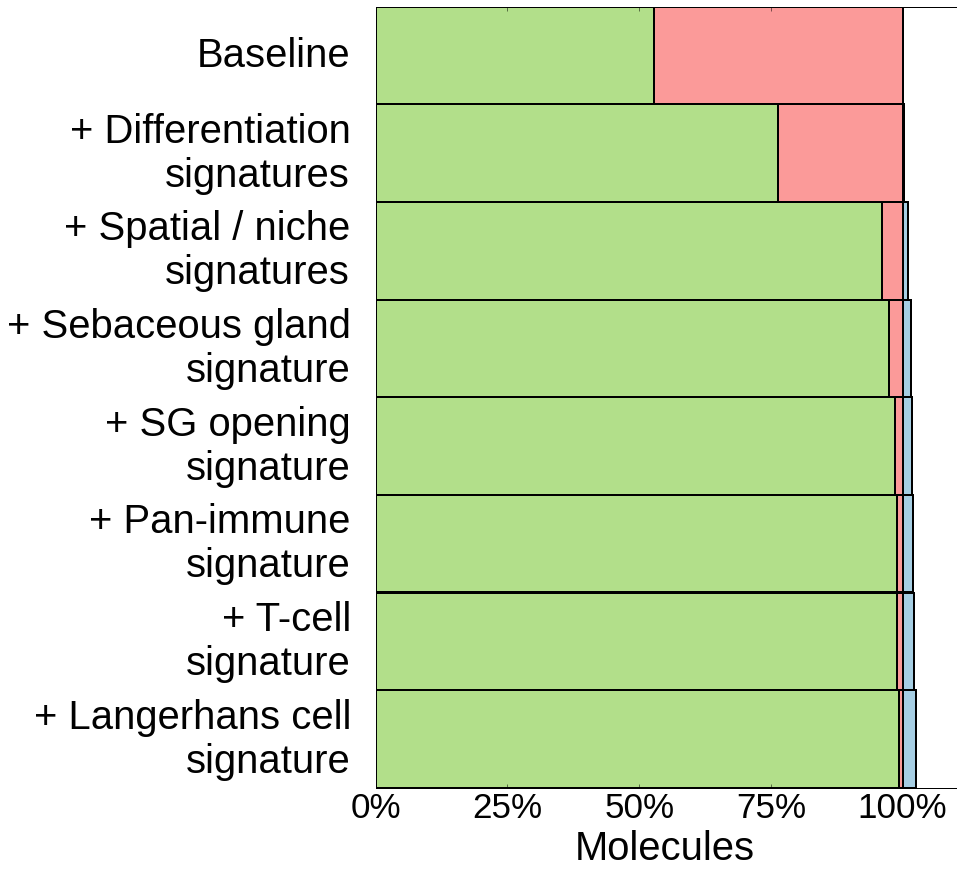

In [91]:
data = NBR_global_sim_coeffs_sc_rel
names = coeff_names

groups = ['0','1','2','3','4','5','6','7']

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (14, 14))
gs = plt.GridSpec(nrows = 1, ncols = 2, wspace=0.02, hspace=0.05, width_ratios=[5,15])

#create labels

ax = plt.subplot(gs[0])

ax.set_ylim(len(groups) - 0.5, - 0.5)

for pos, gr in enumerate(groups):
    ax.text(0.9, pos, names[gr], family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'right')

clean_axis(ax)

#create axes

ax = plt.subplot(gs[1])

ax.spines['right'].set_color('none')

ax.set_ylim(len(groups), 0)
ax.set_xlim(0,1.1)

ax.set_yticks([])
ax.set_xticks([0.0,0.25,0.5,0.75,1.0])
ax.set_xticklabels(['0%','25%','50%','75%','100%'], family = 'Liberation Sans', fontsize = 35)
ax.set_xlabel('Molecules', family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(-0.05, 0.5)

ax.barh(bottom=range(len(groups)),
       width=data.ix['explained', groups],
       height=1.0, 
       color='#b2df8a', 
       linewidth=2)

ax.barh(bottom=range(len(groups)),
       width=data.ix['underexplained', groups],
       height=1.0,
       left=data.ix['explained', groups],
       color='#fb9a99', 
       linewidth=2)

ax.barh(bottom=range(len(groups)),
       width=data.ix['overexplained', groups],
       height=1.0,
       left=data.ix['explained', groups] + data.ix['underexplained', groups],
       color='#a6cee3', 
       linewidth=2)

#for pos in range(len(groups) - 1):
    
    #ax.axhline(pos+1, color = 'black', linewidth = 3)
    
figname = 'v1.8_5_D_Pseudospacetime_model_signatures.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Group-specific model performance

In [67]:
NBR_global_sim_groups_sc = neg_binom_simulate_score_per_group_v3(seq, NBR_global_sim_groups.ix[genes_sel], s_groups_2nd)

In [285]:
NBR_global_sim_groups_sc_rel = NBR_global_sim_groups_sc / NBR_global_sim_groups_sc.ix[['explained','underexplained']].sum()

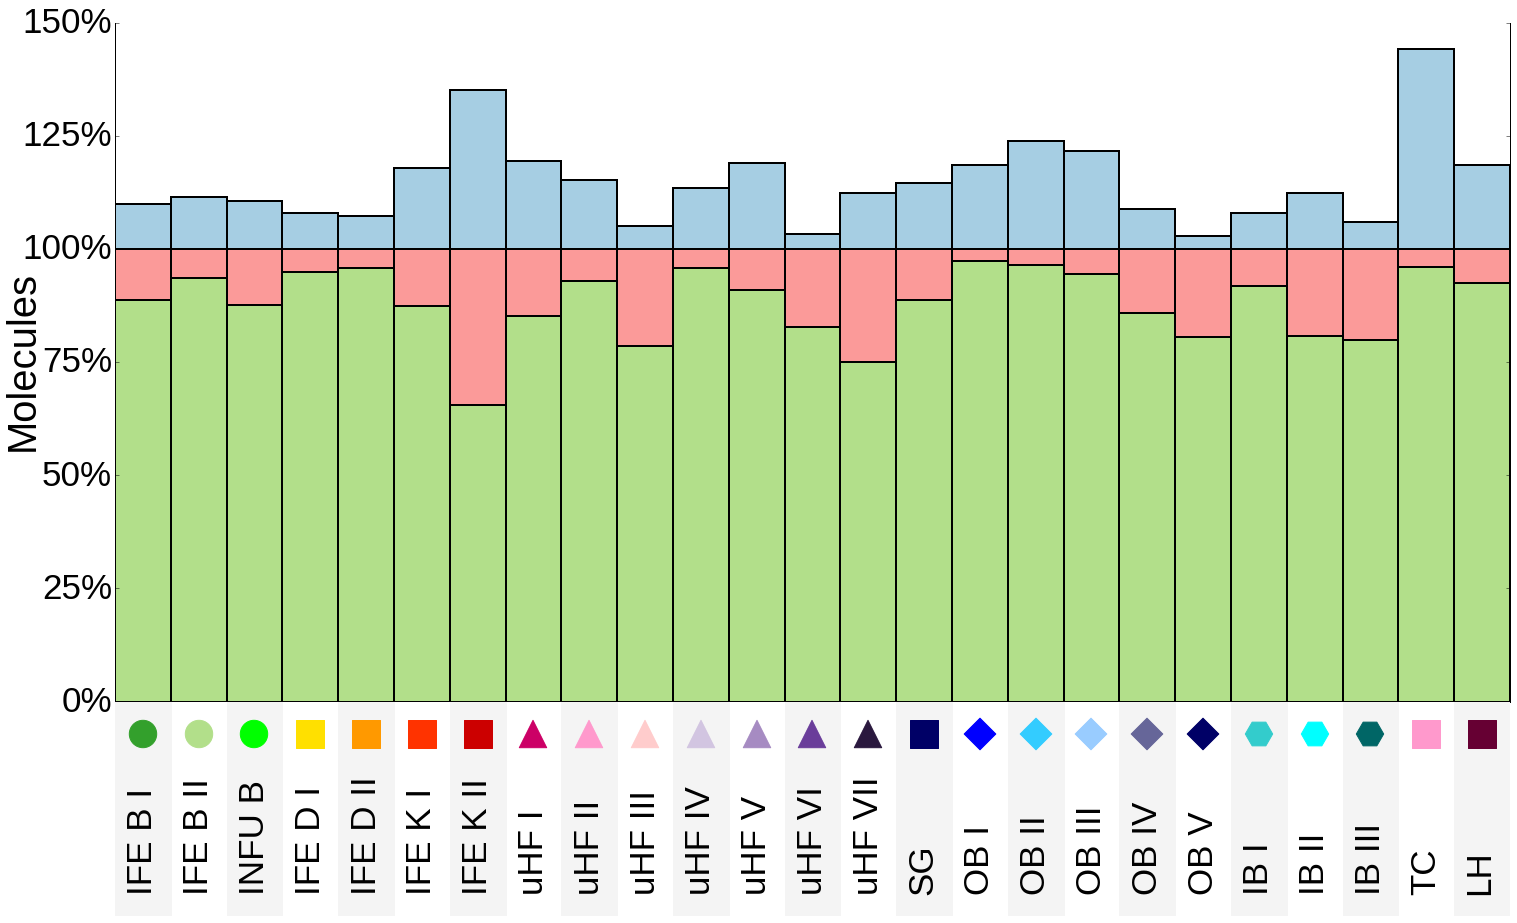

In [305]:
groups = s_groups_2nd
data = NBR_global_sim_groups_sc_rel
cmap = cmap_2nd

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (25, 16))
gs = plt.GridSpec(nrows = 2, ncols = 1, wspace=0.0, hspace=0.00, width_ratios=[1], height_ratios=[19, 6])

#create axes

ax = plt.subplot(gs[0])

ax.spines['top'].set_color('none')

ax.set_xlim(0, len(set(groups)))
ax.set_ylim(0,1.5)

ax.set_xticks([])
ax.set_yticks([0.0,0.25,0.5,0.75,1.0,1.25,1.5])
ax.set_yticklabels(['0%','25%','50%','75%','100%','125%','150%'], family = 'Liberation Sans', fontsize = 35)
ax.set_ylabel('Molecules', family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(-0.05, 0.5)

#plot data

ax.bar(left=range(len(set(groups))),
       height=data.ix['explained'],
       width=1.0, 
       color='#b2df8a', 
       linewidth=2)

ax.bar(left=range(len(set(groups))),
       height=data.ix['underexplained'],
       width=1.0,
       bottom=data.ix['explained'],
       color='#fb9a99', 
       linewidth=2)

ax.bar(left=range(len(set(groups))),
       height=data.ix['overexplained'],
       width=1.0,
       bottom=data.ix['explained'] + data.ix['underexplained'],
       color='#a6cee3', 
       linewidth=2)

#plot group border
"""
for pos, ix in enumerate(groups):
    ax.axvline(pos, linewidth = 1.0, color = 'black')
"""   
#plot explained vs. not explained border vs. in-group variation

ax.step(range(len(set(groups))),
        data.ix['explained'],
        where = 'post', color = 'black', linewidth = 0.5)

ax.step(range(len(set(groups))),
        data.ix['explained'] + data.ix['underexplained'],
        where = 'post', color = 'black', linewidth = 0.5)

#plot bottom sample groups

ax = plt.subplot(gs[1])

ax.set_xlim(-0.5, len(set(groups)) - 0.5)
ax.set_ylim(0,1)

for ix, gr in enumerate(return_unique(groups)):

    if ix % 2 == 0:
        ax.axvspan(ix-0.5,ix+0.5, color = '#F4F4F4', zorder = 0)
        
    ax.scatter(ix, 0.85, color = cmap[gr], s = markers_2nd_size[gr], marker = markers[gr])
    
    ax.text(ix, 0.10, nmap[gr], family = 'Liberation Sans', fontsize = 35, va = 'bottom', ha = 'center', rotation = 'vertical')
        
clean_axis(ax)

figname = 'v1.8_5_E_Pseudospacetime_model_groups.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Cell-specific model performance

In [306]:
NBR_global_sim_cells_sc = neg_binom_simulate_score_per_cell_v3(seq, NBR_global_sim_cells.ix[genes_sel])

In [307]:
NBR_global_sim_cells_sc_rel = NBR_global_sim_cells_sc / NBR_global_sim_cells_sc.ix[['explained','underexplained']].sum()

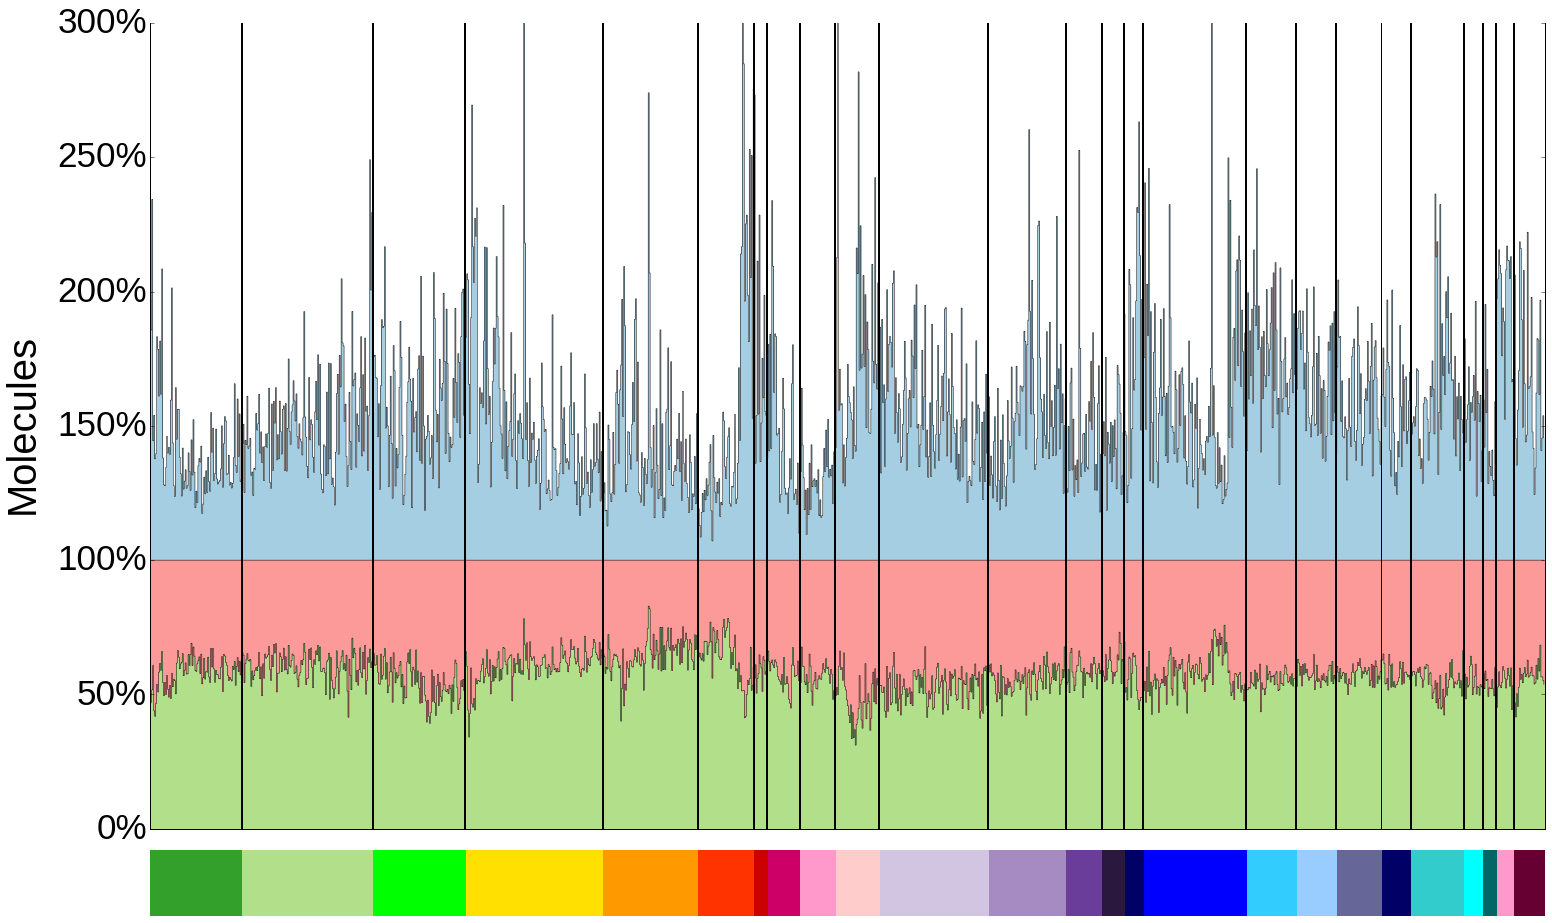

In [318]:
groups = s_groups_2nd
data = NBR_global_sim_cells_sc_rel
cmap = cmap_2nd

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (25, 16))
gs = plt.GridSpec(nrows = 2, ncols = 1, wspace=0.02, hspace=0.05, width_ratios=[1], height_ratios=[9.25, 0.75])

#create axes

ax = plt.subplot(gs[0])

ax.spines['top'].set_color('none')

ax.set_xlim(0, len(groups))
ax.set_ylim(0,3)

ax.set_xticks([])
ax.set_yticks([0.0,0.5,1.0,1.5,2.0,2.5,3.0])
ax.set_yticklabels(['0%','50%','100%','150%','200%','250%','300%'], family = 'Liberation Sans', fontsize = 35)
ax.set_ylabel('Molecules', family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(-0.075, 0.5)

#plot data

ax.bar(left=range(len(groups)),
       height=data.ix['explained'],
       width=1.0, 
       color='#b2df8a', 
       linewidth=0)

ax.bar(left=range(len(groups)),
       height=data.ix['underexplained'],
       width=1.0,
       bottom=data.ix['explained'],
       color='#fb9a99', 
       linewidth=0)

ax.bar(left=range(len(groups)),
       height=data.ix['overexplained'],
       width=1.0,
       bottom=data.ix['explained'] + data.ix['underexplained'],
       color='#a6cee3', 
       linewidth=0)

#plot group border

for pos, ix in enumerate(groups.values[1:]):
    if ix != groups[pos-1]:
        ax.axvline(pos-0.5,
                   0,
                   1,#data.sum().ix[ix] / ax.get_ylim()[1], 
                   linewidth = 1.0, color = 'black')
        
#plot explained vs. not explained border vs. in-group variation

ax.step(range(len(groups)),
        data.ix['explained'],
        where = 'post', color = 'black', linewidth = 0.5)

ax.step(range(len(groups)),
        data.ix['explained'] + data.ix['underexplained'],
        where = 'post', color = 'black', linewidth = 0.5)

ax.step(range(len(groups)),
        data.ix['explained'] + data.ix['underexplained'] + data.ix['overexplained'],
        where = 'post', color = 'black', linewidth = 0.5)

#plot bottom sample groups

ax = plt.subplot(gs[1])

ax.set_xlim(0, len(groups))

for pos, gr in enumerate(groups):
    
    ax.axvspan(pos, pos + 1, color = cmap[gr])
    
remove_ticks(ax)
clean_axis(ax)

figname = 'v1.8_5_F_Pseudospacetime_model_cells.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Comparison of pseudospacetime, 1st level, 2nd level clusterings

In [68]:
NBR_global_sim_groups_sc_rel = NBR_global_sim_groups_sc / NBR_global_sim_groups_sc.sum()

In [69]:
NBR_1st_sim_groups_sc = neg_binom_simulate_score_per_group_v3(seq, NBR_1st_sim_groups.ix[genes_sel], s_groups_2nd)

In [70]:
NBR_1st_sim_groups_sc_rel = NBR_1st_sim_groups_sc / NBR_1st_sim_groups_sc.sum()

In [71]:
NBR_2nd_sim_groups_sc = neg_binom_simulate_score_per_group_v3(seq, NBR_2nd_sim_groups.ix[genes_sel], s_groups_2nd)

In [72]:
NBR_2nd_sim_groups_sc_rel = NBR_2nd_sim_groups_sc / NBR_2nd_sim_groups_sc.sum()

In [73]:
NBR_global_shf_sim_groups_sc = neg_binom_simulate_score_per_group_v3(seq, NBR_global_shf_sim_groups.ix[genes_sel], s_groups_2nd)

In [75]:
NBR_global_shf_sim_groups_sc_rel = NBR_global_shf_sim_groups_sc / NBR_global_shf_sim_groups_sc.sum()

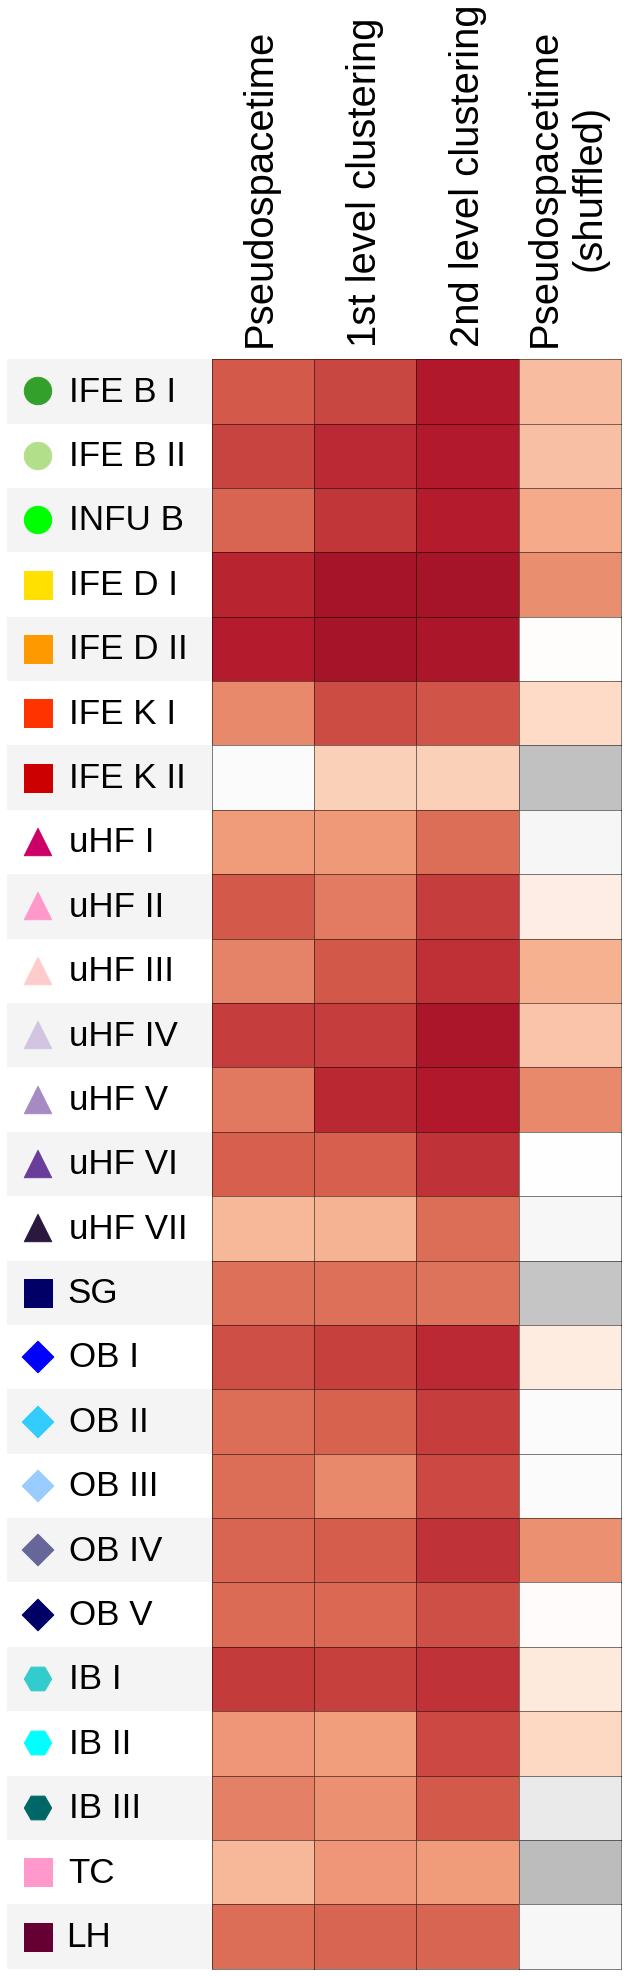

In [371]:
#define parameters

data1 = NBR_global_sim_groups_sc_rel.ix['explained']
data2 = NBR_1st_sim_groups_sc_rel.ix['explained']
data3 = NBR_2nd_sim_groups_sc_rel.ix['explained']
data4 = NBR_global_shf_sim_groups_sc_rel.ix['explained']
groups = s_groups_2nd
cmap = cmap_2nd
nmap = nmap_2nd_short
markers = markers_2nd
cmap_fill = plt.cm.RdGy_r

height = 30
width = 11
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(set(groups)) + 1, 
                  5, 
                  hspace=0.0, 
                  wspace=0.0,
                  width_ratios = [4,2,2,2,2])

#define columns labels

for col, gr in enumerate(['Pseudospacetime','1st level clustering','2nd level clustering', 'Pseudospacetime\n(shuffled)']):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.5, 0.2, gr, family = 'Liberation Sans', fontsize = 40, 
            va = 'bottom', ha = 'center', rotation = 'vertical', fontweight = 'regular')
    clean_axis(ax)
    
    
#define and plot rows

for ix, gr in enumerate(return_unique(groups)):
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    ax.scatter(0.15, 0.5, color = cmap[gr], s = markers_2nd_size[gr], marker = markers[gr])
    
    ax.text(0.3, 0.5, nmap[gr], family = 'Liberation Sans', fontsize = 35, va = 'center', ha = 'left')
    
    if ix % 2 == 0:
        ax.axhspan(0,1, color = '#F4F4F4', zorder = 0)
    
    clean_axis(ax)
    
    #plot data1
    
    ax = plt.subplot(gs[ix+1,1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    ax.axhspan(0,1, color = cmap_fill(data1[gr]), alpha = 1.0)
    
    #plot data2
    
    ax = plt.subplot(gs[ix+1,2])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    ax.axhspan(0,1, color = cmap_fill(data2[gr]), alpha = 1.0)
    
    #plot data3
    
    ax = plt.subplot(gs[ix+1,3])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    ax.axhspan(0,1, color = cmap_fill(data3[gr]), alpha = 1.0)
    
    #plot data4
    
    ax = plt.subplot(gs[ix+1,4])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    ax.axhspan(0,1, color = cmap_fill(data4[gr]), alpha = 1.0)

figname = 'v1.8_5_G_Regression_model_comparison.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

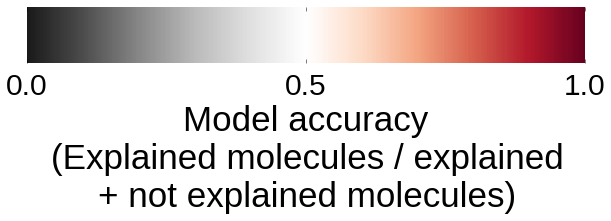

In [372]:
cmap = plt.cm.RdGy_r

#initialize figure

height = 1
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axvspan(pos, pos + 0.001, color = cmap(pos))
    
clean_axis(axLabel)

axLabel.set_xticks([0.0, 0.5, 1.0])
axLabel.set_xticklabels(['0.0', '0.5', '1.0'], family = 'Liberation Sans', fontsize = 30)
    
plt.rcParams['xtick.major.pad'] = 10

axLabel.set_xlabel('Model accuracy\n(Explained molecules / explained\n+ not explained molecules)', family = 'Liberation Sans', fontsize = 35)
axLabel.xaxis.set_label_coords(0.5, -0.75)

figname = 'v1.8_5_G_Legend.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Mean over all groups

In [362]:
data = pd.DataFrame(index = ['mean','std'], columns = ['PST','1st','2nd','PST_shf'])

data['PST'] = [NBR_global_sim_groups_sc_rel.ix['explained'].mean(), NBR_global_sim_groups_sc_rel.ix['explained'].std()]
data['1st'] = [NBR_1st_sim_groups_sc_rel.ix['explained'].mean(), NBR_1st_sim_groups_sc_rel.ix['explained'].std()]
data['2nd'] = [NBR_2nd_sim_groups_sc_rel.ix['explained'].mean(), NBR_2nd_sim_groups_sc_rel.ix['explained'].std()]
data['PST_shf'] = [NBR_global_shf_sim_groups_sc_rel.ix['explained'].mean(), NBR_global_shf_sim_groups_sc_rel.ix['explained'].std()]

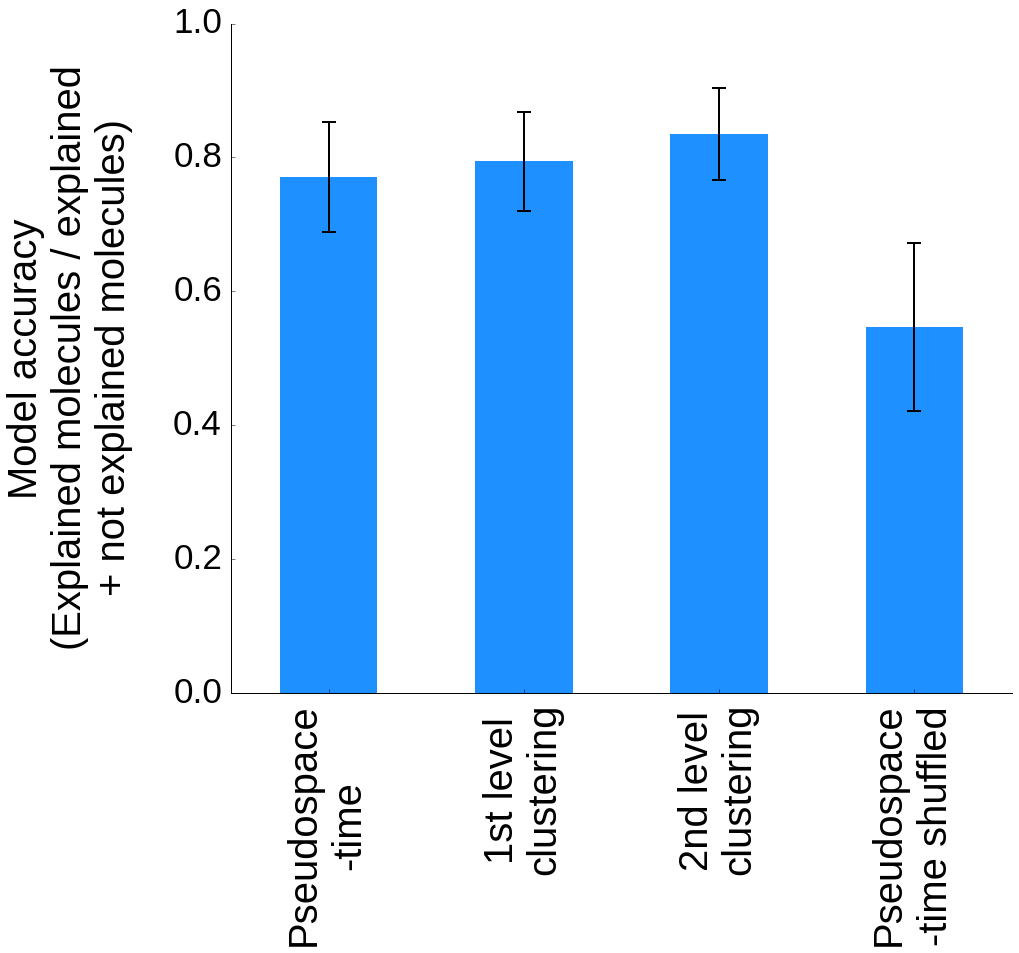

In [368]:
#generate figure

fig = plt.figure(facecolor = 'w', figsize = (14,12))
ax = plt.axes()

#remove spines and ticks from top and right side

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#set x-axis

ax.set_xlim([-0.5, 3.5])
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Pseudospace\n-time', '1st level\nclustering', '2nd level\nclustering', 'Pseudospace\n-time shuffled'], 
                   family = 'Liberation Sans', fontsize = 40, rotation = 'vertical')
ax.tick_params(axis='x', which='major', pad=15)

#set y-axis

ax.set_ylabel('Model accuracy\n(Explained molecules / explained\n+ not explained molecules)', 
              family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(-0.125, 0.5)
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(35) 
                tick.label.set_family('Liberation Sans')
ax.tick_params(axis='y', which='major', pad=10)
            
#plot data

ax.bar([x - 0.25 for x in range(4)],
       data.ix['mean'], 
       0.5,
       color = 'dodgerblue',
       linewidth = 0, 
       yerr = data.ix['std'],
       ecolor = 'black', error_kw = dict(elinewidth=2, capsize = 7, capthick = 2))

figname = 'v1.8_5_E_Model_comparison_summary.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Plot coeffs per group

In [264]:
def neg_binom_simulate_coeffs_per_group_v3(traces, NxK, sample_groups, coeff_dict, repeats=100):
    
    #define output
    
    ix1, ix2 = [], []
    
    for gr in return_unique(sample_groups):
        
        ix1 += [gr] * len(coeff_dict.keys())
        ix2 += coeff_dict.keys()
    
    output_coeffs_per_group = pd.DataFrame(index = traces.index, columns = [np.array(ix1), np.array(ix2)])
    
    #iterate over genes
    
    for g in traces.index:
        
        #sample coeffs [repeats]-times and calculate median
        
        coeffs_tmp = pd.Series([np.median(np.random.choice(traces.ix[g,gr], size = repeats, replace = True) - 1) for gr in traces.columns],
                               index = traces.columns)
        
        #simulate data
        
        data_full_tmp = (coeffs_tmp * NxK.T).T
        
        #iterate over groups
        
        for gr in return_unique(sample_groups):
            
            ix_tmp = sample_groups[sample_groups==gr].index
            
            data_groups_tmp = data_full_tmp[ix_tmp].sum(axis = 1)
            
            #iterate over coeffs
            
            for k in coeff_dict.keys():
                
                coeff_tmp = coeff_dict[k]
                
                output_coeffs_per_group.ix[g][gr][k] = data_groups_tmp[coeff_tmp].sum()
                
    return output_coeffs_per_group

In [292]:
def neg_binom_simulate_score_per_group_per_coeff_v3(data_obs, data_sim, sample_groups):
    
    #prepare output DataFrame

    output = pd.DataFrame(index = ['explained','overexplained','underexplained'], columns = data_sim.columns)
    
    #prepare observed data per group and coeff
    
    data_obs_gr = pd.DataFrame(index = data_sim.index, columns = data_sim.columns)
    
    for col in data_sim.columns:
        
        gr = col[0]
        
        ix_tmp = sample_groups[sample_groups == gr].index
        
        data_obs_gr[col] = data_obs.ix[data_sim.index, ix_tmp].sum(axis = 1)
            
    #calculate difference

    data_diff = data_sim - data_obs_gr

    #get overexplained data

    data_over = data_diff.copy()
    data_over[data_over <0] = 0
        
    output.ix['overexplained'] = data_over.sum(axis = 0)

    #get underexplained data

    data_under = data_diff.copy()
    data_under[data_under >0] = 0

    output.ix['underexplained'] = np.abs(data_under.sum(axis = 0))

    #get explained

    data_exp = data_obs_gr + data_under

    output.ix['explained'] = data_exp.sum(axis = 0)

    return output

In [297]:
coeff_dict = {'0':['Baseline'],
              '1':[c for c in 'ABCDEFGHIJKLMNO'],
              '2':[str(x) for x in range(15)],
              '3':['SG','SG_opening','Immune','TC','LH']}

In [298]:
NBR_global_coeffs_per_group = neg_binom_simulate_coeffs_per_group_v3(NBR_global_traces, NxK_global, s_groups_2nd, coeff_dict, repeats=100)

In [305]:
NBR_global_coeffs_per_group_sc = neg_binom_simulate_score_per_group_per_coeff_v3(seq, NBR_global_coeffs_per_group.ix[genes_sel], s_groups_2nd)

In [310]:
NBR_global_coeffs_per_group_sc_rel = NBR_global_coeffs_per_group_sc / NBR_global_coeffs_per_group_sc.sum(axis = 0)

In [332]:
cmap_bars = {'0':'silver',
             '1':'#e41a1c',
             '2':'#377eb8',
             '3':'#4daf4a'}

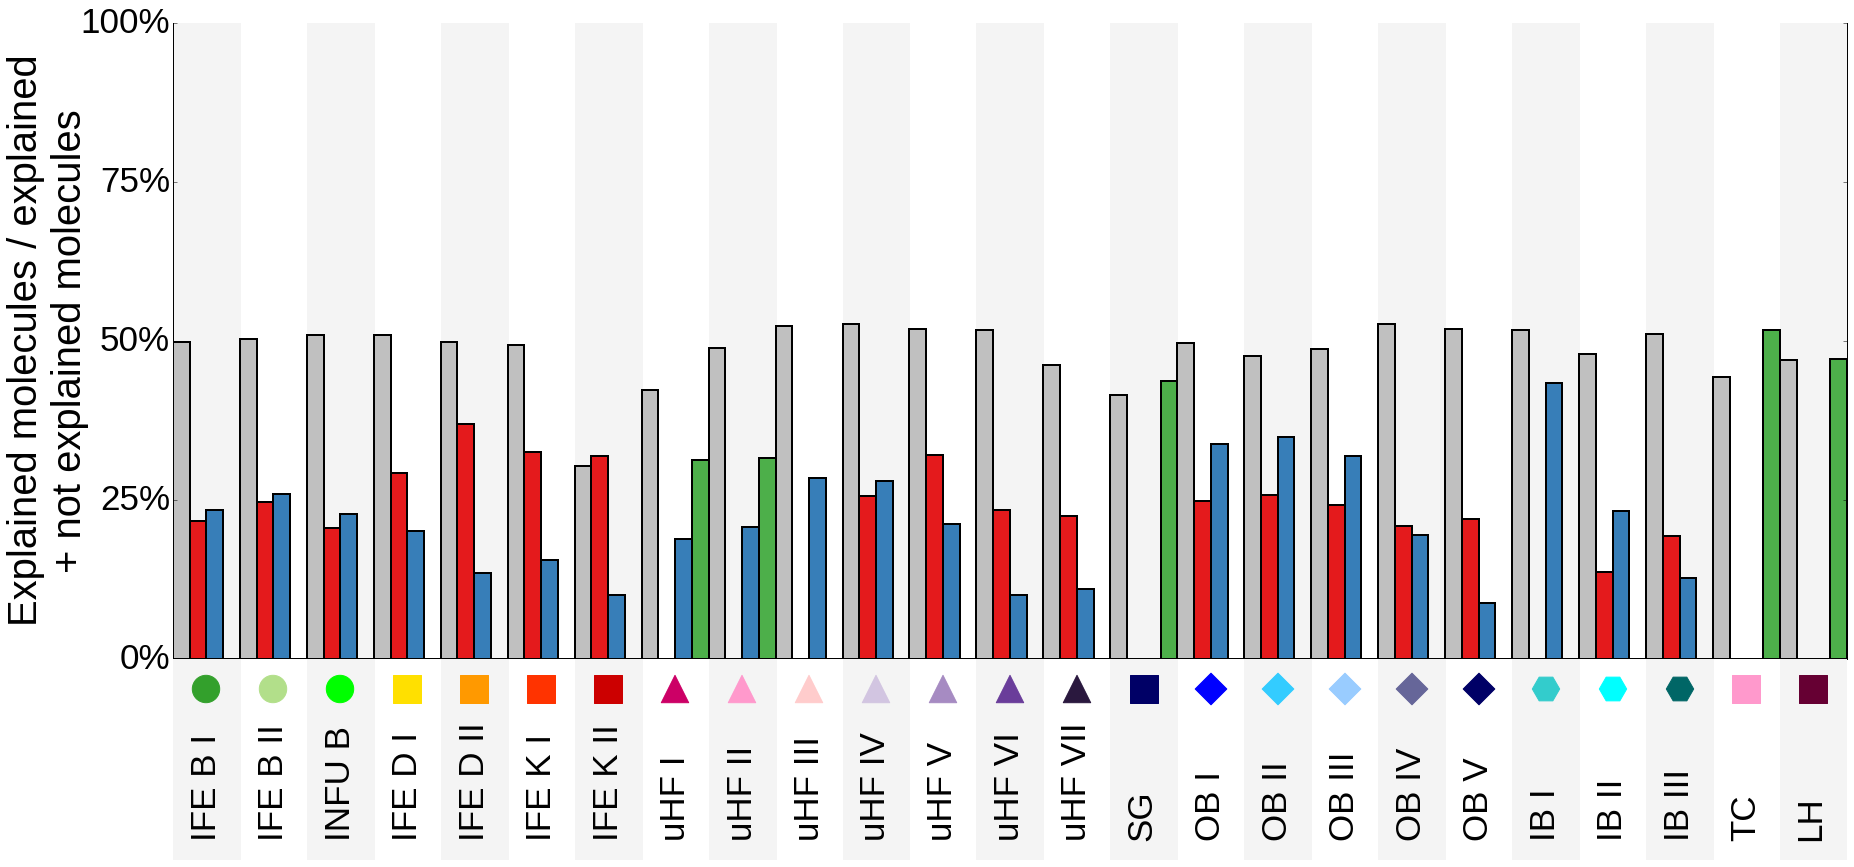

In [369]:
groups = s_groups_2nd
data = NBR_global_coeffs_per_group_sc_rel
cmap = cmap_2nd

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (30, 15))
gs = plt.GridSpec(nrows = 2, ncols = 1, wspace=0.0, hspace=0.00, width_ratios=[1], height_ratios=[19, 6])

#create axes

ax = plt.subplot(gs[0])

ax.spines['top'].set_color('none')

ax.set_xlim(0, len(data.columns))
ax.set_ylim(0,1.0)

ax.set_xticks([])
ax.set_yticks([0.0,0.25,0.5,0.75,1.0])
ax.set_yticklabels(['0%','25%','50%','75%','100%'], family = 'Liberation Sans', fontsize = 35)
ax.set_ylabel('Explained molecules / explained\n+ not explained molecules', family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(-0.05, 0.5)

#plot data

for pos1, gr in enumerate(return_unique(groups)):
    
    for pos2, k in enumerate(['0','1','2','3']):
        
        ax.bar(left=pos1 * 4 + pos2,
               height=data.ix['explained'][gr][k],
               width=1.0, 
               color=cmap_bars[k], 
               linewidth=2)
        
    if pos1 % 2 == 0:
        ax.axvspan(pos1 * 4,pos1 * 4 + 4, color = '#F4F4F4', zorder = 0)

#plot bottom sample groups

ax = plt.subplot(gs[1])

ax.set_xlim(-0.5, len(set(groups)) - 0.5)
ax.set_ylim(0,1)

for ix, gr in enumerate(return_unique(groups)):

    if ix % 2 == 0:
        ax.axvspan(ix-0.5,ix+0.5, color = '#F4F4F4', zorder = 0)
        
    ax.scatter(ix, 0.85, color = cmap[gr], s = markers_2nd_size[gr], marker = markers[gr])
    
    ax.text(ix, 0.10, nmap[gr], family = 'Liberation Sans', fontsize = 35, va = 'bottom', ha = 'center', rotation = 'vertical')
        
clean_axis(ax)

figname = 'v1.8_SX_X_Populations_signatures.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)